<a href="https://colab.research.google.com/github/shambhavi-d/Misorientation_Modelling_FYP/blob/main/Random_Forest_Regression_Model_for_Taylor_Factor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Importing the dataset and assigning input and output variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/all_per_strain.xlsx")
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[-1.4031e+02  3.6160e+01  6.9800e+01  1.0000e-02]
 [ 1.6670e+02  2.8660e+01  4.5760e+01  1.0000e-02]
 [ 1.4975e+02  8.5930e+01  3.8520e+01  1.0000e-02]
 ...
 [-1.2843e+02  3.1980e+01  1.4689e+02  2.0000e-01]
 [ 1.3010e+02  7.9840e+01 -8.4770e+01  2.0000e-01]
 [-3.8690e+01  6.6180e+01  1.1846e+02  2.0000e-01]]


In [ ]:
print(y)

[2.572 2.519 2.567 ... 2.561 2.113 2.723]


###Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

###Training the Random Forest Regression Model on the training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 20)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=20)

###Predicting results on the test set

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.12 2.12]
 [3.03 3.1 ]
 [2.58 2.6 ]
 ...
 [2.59 2.61]
 [2.16 2.13]
 [2.44 2.44]]


###Plotting the graph of Predicted vs Test results

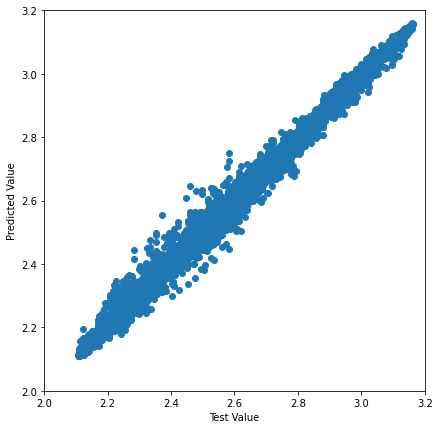

In [ ]:
from matplotlib import pyplot as plt
plt.plot(y_test, y_pred, 'o')
plt.xlim([2.0, 3.2])
plt.ylim([2.0, 3.2])
plt.xlabel("Test Value")
plt.ylabel("Predicted Value")
plt.gcf().set_size_inches((7, 7))
ax = plt.gca()
ax.set_aspect(1)
plt.show()

### Assessing fit of the regression model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9920594002636449

In [ ]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)

0.028147418009867666
